### Projeto - Super Computação

#### Eiki Luis Yamashiro |  7 - semestre | Engenharia de Computação  | Insper

#### Import das Bibliotecas

In [55]:
import random
import subprocess
import time 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

#### Define de Constantes

In [57]:
START = 1
END = 300
INTERVAL = 20

#### Gerando os Arquivos de Entrada

Dado o objetivo de comparar os dois algoritmos, vamos gerar entradas com diferentes tamanhos. A função abaixo utiliza a função do numppy arange para criar um intervalo de START até END com um passo de INTERVAL. Assim, através de um laço for, vamos criar um arquivo dna.seq com o tamanho correspondente ao item do arange da atual iteração.

In [58]:
def generate_sequency(start=1, end=200, interval=10):
    index = 1
    
    for e in np.arange(start, end, interval):
        
        n = e
        m = e+1

        file = f'inputs/dna{index}.seq'
        f = open(file, 'w')
        seq=[str(n)+'\n',
             str(m)+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()
        index += 1
        
    return index

inputs_num = generate_sequency(START, END, INTERVAL)

print(f"Quantidade de arquivos gerados: {inputs_num}")

Quantidade de arquivos gerados: 16


#### Rodando os Exe com os Inputs

Abaixo é definida uma função que permite com que se obtenha a saída do executável e o tempo de execução para uma determinada entrada.

In [3]:
def roda_com_entrada(executavel, arquivo_in):
    with open(f'inputs/{arquivo_in}') as f:
        start = time.perf_counter()
        proc = subprocess.run([f'./compare/{executavel}'], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
    
    f.close()
    return (proc.stdout, end-start)

Com o intuito de compararmos os resultados, vamos guardar os tempos de execução para cada entrada gerada anteriormente.

In [59]:
local_random = []
smith_waterman = []

for i in range(1, inputs_num):
    smith_waterman.append(roda_com_entrada("smith_waterman", f"dna{i}.seq")[1])
    local_random.append(roda_com_entrada("local_random", f"dna{i}.seq")[1])

#### Comparando os dois Algoritmos

Com o tempo de execução salvo para cada entrada gerada, podemos plotar um gráfico para comparar o tamanho da sequência e o tempo de execução. Vale lembrar que os dois algoritmos aceitam sequências de diferentes tamanhos, porém para facilitar a análise consideramos sequências de tamanho i e i+1. Assim quando o Input Size do gráfico for 1, significa que a entrada foi duas sequências de tamanho 1 e 2. Quando o Input Size do gráfico for 10, significa que a entrada foi duas sequências de tamanho 10 e 11. E assim por diante.

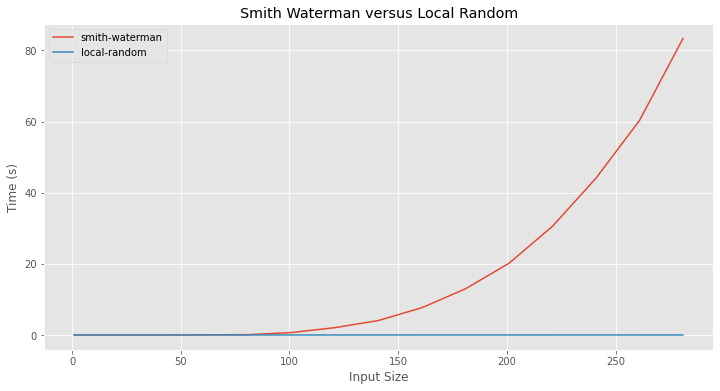

In [60]:
plt.figure(figsize=(12,6))
plt.title("Smith Waterman versus Local Random")
plt.plot(np.arange(START, END, INTERVAL), smith_waterman, label = "smith-waterman")
plt.plot(np.arange(START, END, INTERVAL), local_random, label = "local-random")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.show()